In [55]:
# loading mnist data

from sklearn.datasets import fetch_openml
# no convert as Dataframe
mnist = fetch_openml('mnist_784', as_frame=False)  

/Users/mac/anaconda3/envs/ds-env/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [56]:
X, y = mnist.data, mnist.target
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

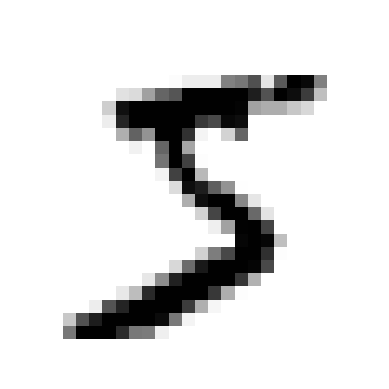

In [77]:
import matplotlib.pyplot as plt
import random 

def plot_digit(data, title=""):
    image = data.reshape(28, 28)
    plt.title(title)
    plt.imshow(image, cmap=plt.cm.binary,
               interpolation="nearest")
    plt.axis("off")

value = X[0]
plot_digit(value)
plt.show()

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]





In [85]:
# Sistution of number for boolean
y_train_7 = (y_train == '5')
y_test_7 = (y_test == '5')

display(y_train_7)
display(y_test_7)

array([ True, False, False, ...,  True, False, False])

array([False, False, False, ..., False,  True, False])

In [86]:
# SGB is capable of handling very large datasets efficiently

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_7)



SGDClassifier(random_state=42)

In [89]:
sgd_clf.predict([value])

array([ True])

In [90]:
# validation in performace

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [91]:
from sklearn.dummy import DummyClassifier

dmy_clf = DummyClassifier()
dmy_clf.fit(X_train, y_train)
dmy_clf.predict(X_train[0])

cross_val_score(dmy_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.11235, 0.11235, 0.1124 ])

In [92]:
#implementing cross validation using StratifiedKFold

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)


for train_index, test_index in skfolds.split(X_train, y_train_7):
    
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.8787
0.8495
0.85815


In [93]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_7, cv = 3)

In [97]:
# using confusion matrix to evaluate the model


from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
cm = confusion_matrix(y_train_7, y_train_pred)
display("confusion_matrix",cm)

pc = precision_score(y_train_7, y_train_pred)
display("precision_score",pc)
rs = recall_score(y_train_7, y_train_pred)
display("recall_score", rs)
f1 = f1_score(y_train_7, y_train_pred)
display("f1_score", f1)

'confusion_matrix'

array([[53892,   687],
       [ 1891,  3530]])

'precision_score'

0.8370879772350012

'recall_score'

0.6511713705958311

'f1_score'

0.7325171197343846

In [101]:
y_scores = sgd_clf.decision_function([value])
y_scores

threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

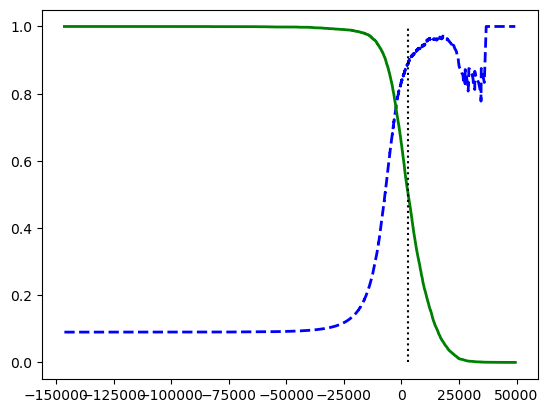

In [102]:
# how do you decide which threshold to use?
# first, use cross_val_predict() to get the scores of all instances in the training set, but this time specify that you want to return decision scores instead of predictions:

y_scores = cross_val_predict(sgd_clf, X_train, y_train_7, cv=3,
                                method="decision_function")


from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_7, y_scores)
threshold = 3000
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, 'k', 'dotted', label="Decision threshold")

plt.show()

In [103]:
#
import numpy as np
idx_for_threshold = np.argmax(precisions >= 0.90)
threshold_90 = thresholds[idx_for_threshold]

y_train_pred_90 = (y_scores >= threshold_90)
precision_score(y_train_7, y_train_pred_90)
recall_score(y_train_7, y_train_pred_90)

0.4799852425751706